In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Blocking_Ab_Exp_Image_data.csv')

In [3]:
concat_df = df[['label', 'area', 'mean', 'Cell']]

In [4]:
image_id = []
channel = []
animal_id = []


for i in range(len(concat_df)):
    image_id = np.append(image_id, concat_df['label'][i].split('.')[0])
    channel = np.append(channel, concat_df['label'][i].split(':')[2].split('/')[0])
    animal_id = np.append(animal_id, concat_df['label'][i].split('_')[0])
    
concat_df['image_id'] = image_id
concat_df['channel'] = channel
concat_df['animal_id'] = animal_id

concat_df['norm_mean'] = concat_df['mean'] / concat_df['area'];

In [5]:
tmem_df = concat_df[concat_df['channel']=='3'].reset_index()
iba_df = concat_df[concat_df['channel']=='4'].reset_index()
cd68_df = concat_df[concat_df['channel']=='2'].reset_index()

In [6]:
cd68_df

,index,label,area,mean,Cell,image_id,channel,animal_id,norm_mean
0,2,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,2614.994,184.399,1,B01_1_MIP,2,B01,0.070516
1,5,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,4043.275,177.200,2,B01_1_MIP,2,B01,0.043826
2,8,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,2525.385,160.056,3,B01_1_MIP,2,B01,0.063379
3,11,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,2532.908,191.284,4,B01_1_MIP,2,B01,0.075520
4,14,B01_2_MIP.czi:c:2/4 - B01_2_MIP.czi #1,1956.247,172.690,1,B01_2_MIP,2,B01,0.088276
...,...,...,...,...,...,...,...,...,...
323,971,B32_2_MIP.czi:c:2/4 - B32_2_MIP.czi #1,2086.461,128.957,4,B32_2_MIP,2,B32,0.061807
324,974,B32_3_MIP.czi:c:2/4 - B32_3_MIP.czi #1,2256.970,140.731,1,B32_3_MIP,2,B32,0.062354
325,977,B32_3_MIP.czi:c:2/4 - B32_3_MIP.czi #1,2248.932,111.549,2,B32_3_MIP,2,B32,0.049601
326,980,B32_3_MIP.czi:c:2/4 - B32_3_MIP.czi #1,2024.162,137.604,3,B32_3_MIP,2,B32,0.067981


In [7]:
tmem_norm = tmem_df['norm_mean'] - iba_df['norm_mean']
cd68_norm = cd68_df['norm_mean'] - iba_df['norm_mean']

In [8]:
cd68_norm

0      0.021379
1      0.006129
2      0.014696
3      0.020811
4      0.010045
         ...   
323    0.007211
324    0.007608
325   -0.000547
326    0.004354
327    0.008275
Name: norm_mean, Length: 328, dtype: float64

In [9]:
tmem_df['tmem_norm'] = tmem_norm
tmem_df['cd68_norm'] = cd68_norm

In [10]:
tmem_df

,index,label,area,mean,Cell,image_id,channel,animal_id,norm_mean,tmem_norm,cd68_norm
0,1,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,2614.994,209.618,1,B01_1_MIP,3,B01,0.080160,0.031023,0.021379
1,4,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,4043.275,220.644,2,B01_1_MIP,3,B01,0.054571,0.016873,0.006129
2,7,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,2525.385,191.052,3,B01_1_MIP,3,B01,0.075653,0.026970,0.014696
3,10,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,2532.908,197.332,4,B01_1_MIP,3,B01,0.077907,0.023199,0.020811
4,13,B01_2_MIP.czi:c:3/4 - B01_2_MIP.czi #1,1956.247,152.132,1,B01_2_MIP,3,B01,0.077767,-0.000464,0.010045
...,...,...,...,...,...,...,...,...,...,...,...
323,970,B32_2_MIP.czi:c:3/4 - B32_2_MIP.czi #1,2086.461,269.021,4,B32_2_MIP,3,B32,0.128937,0.074341,0.007211
324,973,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2256.970,260.769,1,B32_3_MIP,3,B32,0.115539,0.060793,0.007608
325,976,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2248.932,270.575,2,B32_3_MIP,3,B32,0.120313,0.070164,-0.000547
326,979,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2024.162,361.739,3,B32_3_MIP,3,B32,0.178710,0.115084,0.004354


In [11]:
final_df = tmem_df.drop(columns = {'index', 'label', 'area', 'mean', 'channel', 'norm_mean'})

In [12]:
tmem_cd68_ratio = final_df['tmem_norm'] / final_df['cd68_norm']

(array([ 62., 113.,  69.,  38.,  15.,  13.,   8.,   4.,   4.,   2.]),
 array([-0.01747098,  0.03029879,  0.07806856,  0.12583832,  0.17360809,
         0.22137786,  0.26914763,  0.3169174 ,  0.36468717,  0.41245693,
         0.4602267 ]),
 <a list of 10 Patch objects>)

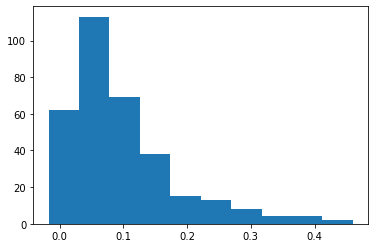

In [13]:
plt.hist(final_df['tmem_norm'])

In [15]:
final_df[final_df['tmem_norm'] > .15]
final_df[final_df['tmem_norm'] < .05]

,Cell,image_id,animal_id,tmem_norm,cd68_norm
0,1,B01_1_MIP,B01,0.031023,0.021379
1,2,B01_1_MIP,B01,0.016873,0.006129
2,3,B01_1_MIP,B01,0.026970,0.014696
3,4,B01_1_MIP,B01,0.023199,0.020811
4,1,B01_2_MIP,B01,-0.000464,0.010045
...,...,...,...,...,...
316,1,B32_1_MIP,B32,0.038696,0.010283
317,2,B32_1_MIP,B32,0.040107,0.015117
320,1,B32_2_MIP,B32,0.045564,0.010534
321,2,B32_2_MIP,B32,0.049186,0.010089


In [16]:
plt.hist(output_df[output_df['Ab'] == 'a-IL34']['cd68_norm'], bins = 50)
plt.axvline(0, color='k', linestyle='dashed', linewidth=2)
plt.axvline(0.01, color='k', linestyle='dashed', linewidth=2)
plt.axis([-0.1, .15, 0, 20])
plt.title('a-IL34');

NameError: name 'output_df' is not defined

In [16]:
plt.hist(output_df[output_df['Ab'] == 'a-gp120']['cd68_norm'], bins = 50, range=[-0.1, .15]);
plt.axvline(0, color='k', linestyle='dashed', linewidth=2)
plt.axvline(0.01, color='k', linestyle='dashed', linewidth=2)
plt.axis([-0.1, .15, 0, 20])
plt.title('a-gp120');

NameError: name 'output_df' is not defined

In [17]:
final_df[final_df['cd68_norm'] > .01]
final_df[final_df['cd68_norm'] < 0]

,Cell,image_id,animal_id,tmem_norm,cd68_norm
5,2,B01_2_MIP,B01,0.026985,-0.000492
12,1,B02_1_MIP,B02,0.053961,-0.029086
13,2,B02_1_MIP,B02,0.068223,-0.007692
14,3,B02_1_MIP,B02,0.024541,-0.038162
15,4,B02_1_MIP,B02,0.089527,-0.048783
...,...,...,...,...,...
312,1,B30_3_MIP,B30,0.102163,-0.071863
313,2,B30_3_MIP,B30,0.056325,-0.035669
314,3,B30_3_MIP,B30,0.060839,-0.023091
315,4,B30_3_MIP,B30,0.047180,-0.011972


In [18]:
cd68_status = ['mid'] * len(final_df)
tmem_status = ['mid'] * len(final_df)

for i in range(len(final_df)):
    if final_df['cd68_norm'][i] > .01:
        cd68_status[i] = 'high'
    elif final_df['cd68_norm'][i] < 0:
        cd68_status[i] = 'low'
    else:
        pass

    
for i in range(len(final_df)):
    if final_df['tmem_norm'][i] > .1:
        tmem_status[i] = 'high'
    elif final_df['tmem_norm'][i] < .05:
        tmem_status[i] = 'low'
    else:
        pass
        
np.unique(tmem_status, return_counts = True)       

final_df['tmem_status'] = tmem_status
final_df['cd68_status'] = cd68_status

In [19]:
sample_metadata = pd.read_csv('sample_metadata.csv')

In [20]:
output_df = pd.merge(sample_metadata, final_df, on ='animal_id')

In [21]:
output_df[output_df['animal_id'] == 'B03']

,Breeder ID,Animal ID,Age,Section Key,Breeder ID.1,Animal ID.1,Sex,Age.1,Date of Surgery,Ab,animal_id,Cell,image_id,tmem_norm,cd68_norm,tmem_status,cd68_status
260,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,1,B03_1_MIP,0.037562,0.007751,low,mid
261,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,2,B03_1_MIP,0.027263,0.030270,low,high
262,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,3,B03_1_MIP,0.157457,0.013992,high,high
263,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,4,B03_1_MIP,0.052192,0.019235,mid,high
264,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,1,B03_2_MIP,0.023923,0.023584,low,high
265,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,2,B03_2_MIP,0.051721,0.031200,mid,high
266,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,3,B03_2_MIP,-0.005881,0.042169,low,high
267,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,4,B03_2_MIP,0.045597,0.012530,low,high
268,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,1,B03_3_MIP,0.010706,0.022607,low,high
269,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,B03,2,B03_3_MIP,0.018596,0.006318,low,mid


In [22]:
percent_high_tmem = []
percent_high_cd68 = []
percent_double = []
percent_double_tmem = []

for i in np.unique(output_df['animal_id']):
    int_df = output_df[output_df['animal_id'] == i]
    percent_high_tmem = np.append(percent_high_tmem, (len(int_df[int_df['tmem_status'] == 'high']) / len(int_df['tmem_status']))*100)
    percent_high_cd68 = np.append(percent_high_cd68, (len(int_df[int_df['cd68_status'] == 'high']) / len(int_df['cd68_status']))*100)
    
    int_int_df = int_df[int_df['cd68_status'] == 'high']
    percent_double = np.append(percent_double, len(int_int_df[int_int_df['tmem_status'] == 'low']) / len(int_df['tmem_status'])*100)
    
    int_tmem_df = int_df[int_df['tmem_status'] == 'high']
    percent_double_tmem = np.append(percent_double_tmem, len(int_tmem_df[int_tmem_df['cd68_status'] == 'low']) / len(int_df['cd68_status'])*100)
    

In [23]:
summed_output = pd.DataFrame(percent_high_tmem, np.unique(output_df['animal_id'])).join(sample_metadata.set_index('animal_id'))

In [24]:
summed_output['percent_high_cd68'] = percent_high_cd68
summed_output['percent_double'] = percent_double
summed_output['percent_double_tmem'] = percent_double_tmem


In [25]:
summed_output

,0,Breeder ID,Animal ID,Age,Section Key,Breeder ID.1,Animal ID.1,Sex,Age.1,Date of Surgery,Ab,percent_high_cd68,percent_double,percent_double_tmem
B01,0.000000,W(26),F2,P17,B01,W(26),F2,Female,P15,12/8/2022,a-IL34,41.666667,41.666667,0.000000
B02,0.000000,W(22),F2,P17,B02,W(22),F2,Female,P15,12/18/2022,a-gp120,0.000000,0.000000,0.000000
B03,8.333333,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34,66.666667,41.666667,0.000000
B04,100.000000,W(26),M1,P17,B04,W(26),M1,Male,P15,12/8/2022,a-gp120,16.666667,0.000000,75.000000
B06,25.000000,W(26),M3,P17,B06,W(26),M3,Male,P15,12/8/2022,a-CSF1,100.000000,25.000000,0.000000
B08,0.000000,W(22),M3,P17,B08,W(22),M3,Male,P15,12/18/2022,a-IL34,58.333333,41.666667,0.000000
B09,25.000000,W(27),M2,P17,B09,W(27),M2,Male,P15,12/20/2022,a-IL34,0.000000,0.000000,8.333333
B10,16.666667,W(25),F1,P17,B10,W(25),F1,Female,P15,12/10/2022,a-IL34,33.333333,25.000000,0.000000
B11,91.666667,W(22),F3,P17,B11,W(22),F3,Female,P15,12/18/2022,a-CSF1,100.000000,0.000000,0.000000
B12,75.000000,W(22),F1,P17,B12,W(22),F1,Female,P15,12/18/2022,a-gp120,8.333333,0.000000,75.000000


In [26]:
summed_output.to_csv('percentages.csv')